In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os

In [3]:
from jupyterworkflow.data import get_fremont_data

In [4]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [5]:
data = get_fremont_data()

In [6]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


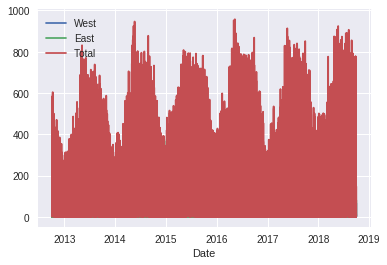

In [7]:
data.plot()

In [8]:
?data.resample

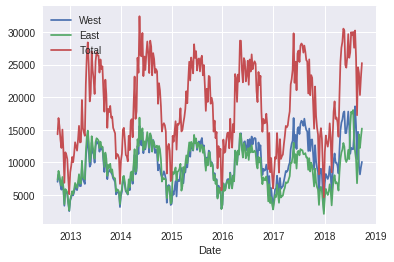

In [9]:
data.resample('W').sum().plot()

(0, 1080850.45)

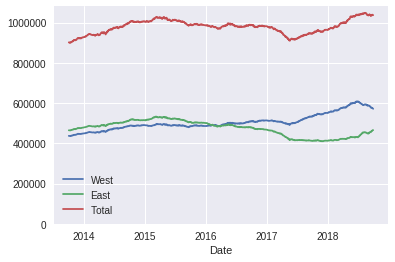

In [10]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

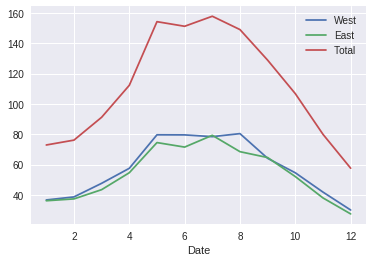

In [11]:
data.groupby(data.index.month).mean().plot()

In [12]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:24,:10]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0
05:00:00,31.0,26.0,25.0,5.0,9.0,23.0,31.0,25.0,12.0,14.0
06:00:00,155.0,142.0,105.0,27.0,17.0,137.0,153.0,149.0,43.0,87.0
07:00:00,352.0,319.0,319.0,33.0,26.0,327.0,368.0,340.0,304.0,183.0
08:00:00,437.0,418.0,370.0,105.0,69.0,457.0,462.0,435.0,404.0,268.0
09:00:00,276.0,241.0,212.0,114.0,103.0,278.0,275.0,255.0,189.0,145.0


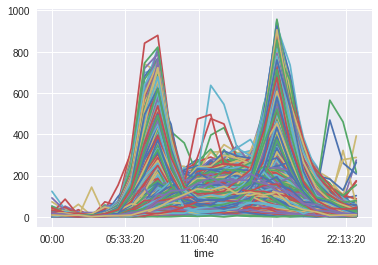

In [13]:
pivoted.plot(legend=False)

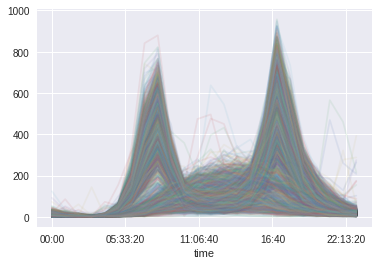

In [14]:
pivoted.plot(legend=False, alpha=0.1) # alpha => Transparency